# Visualization with Seaborn

Matplotlib is powerful, but it can sometimes be verbose to create complex statistical plots. This is where Seaborn comes in.
Seaborn is a data visualization library built on top of Matplotlib. Its primary goal is to make creating beautiful, informative statistical plots much easier and more intuitive.
Key Advantages of Seaborn:
- It has a high-level API with simple functions for complex plots.
- It comes with beautiful default styles and color palettes.
- It integrates seamlessly with Pandas DataFrames.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

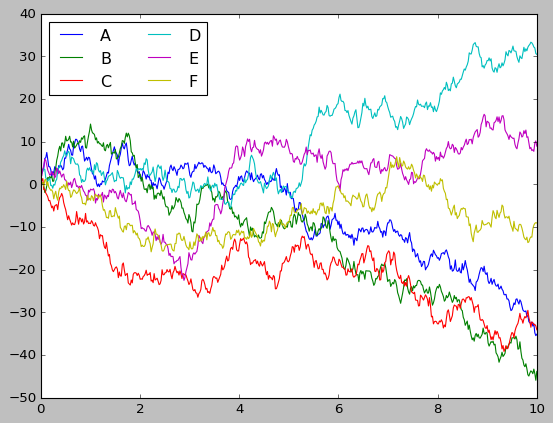

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [5]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

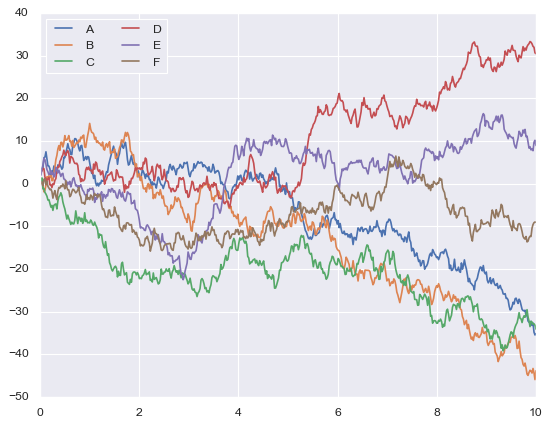

In [6]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah! Much better. As you can see, just by importing Seaborn and calling sns.set(), our plot is instantly more modern and readable. This is Seaborn's first big win: it makes your existing Matplotlib plots look better.

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

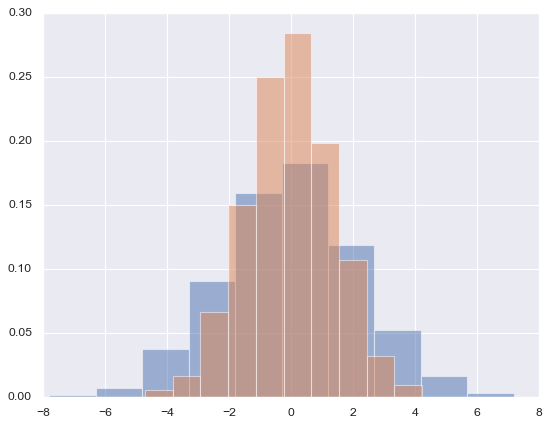

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

C:\Users\adria\AppData\Local\Temp\ipykernel_14852\4143655892.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_14852\4143655892.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


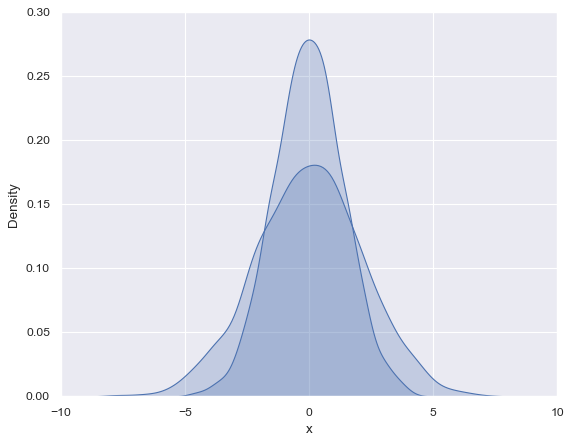

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

C:\Users\adria\AppData\Local\Temp\ipykernel_14852\923662334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
C:\Users\adria\AppData\Local\Temp\ipykernel_14852\923662334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


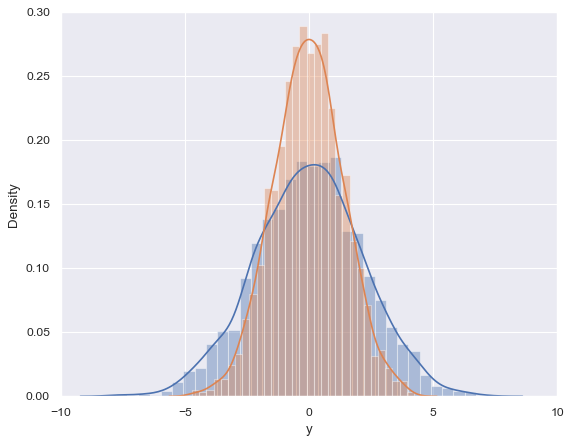

In [9]:
sns.distplot(data['x'])
sns.distplot(data['y']);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

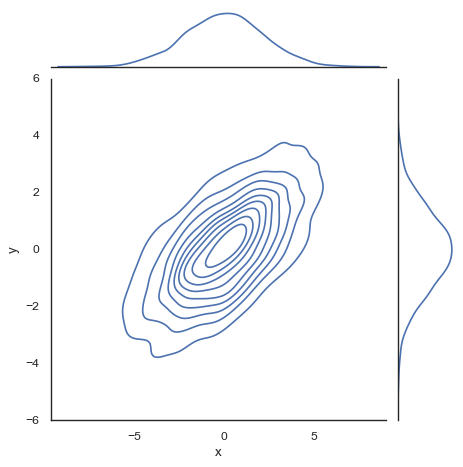

In [10]:
with sns.axes_style('white'):
    sns.jointplot(data = data, x = "x", y = "y", kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

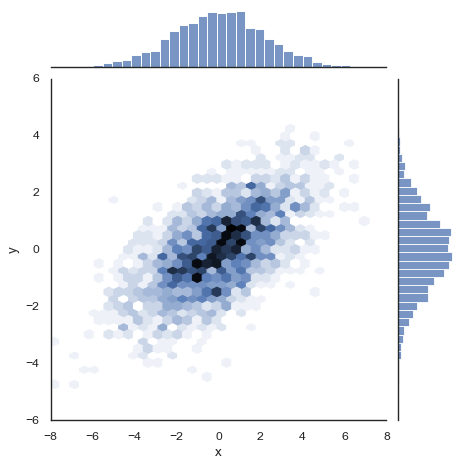

In [11]:
with sns.axes_style('white'):
    sns.jointplot(data = data, x = "x", y = "y", kind='hex')

Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

### Faceted histograms



In [12]:
# Seaborn comes with several useful datasets built-in.
# Let's load the 'tips' dataset into a Pandas DataFrame.
tips = sns.load_dataset('tips')

# Let's see the first few rows of the data.
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. Visualizing a Single Variable (Univariate Analysis)

The first step in data analysis is often to understand the distribution of individual variables.

**Question**: What is the distribution of total bill amounts?
A histogram is perfect for this. We can use sns.histplot.

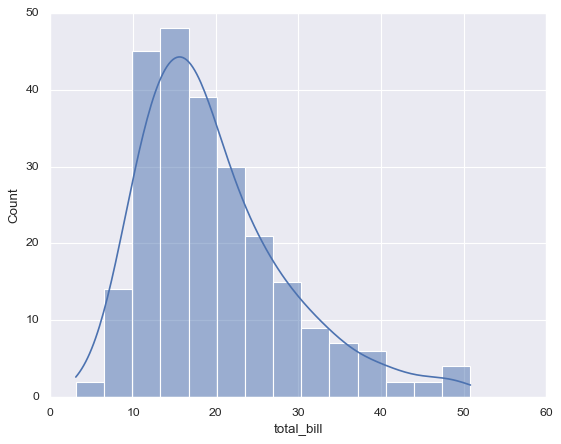

In [13]:
# Create a histogram of the 'total_bill' column.
# The 'kde=True' argument adds a smooth density line.
sns.histplot(data=tips, x='total_bill', kde=True);

This plot quickly shows us that most bills are between $10 and $20.

**2. Visualizing Relationships Between Two Variables (Bivariate Analysis)**

Next, we want to see how two variables relate to each other.

**Question:** Is there a relationship between the total bill and the tip amount?

A **scatterplot** is the classic way to visualize this. We can use `sns.scatterplot`.

<Axes: xlabel='total_bill', ylabel='tip'>

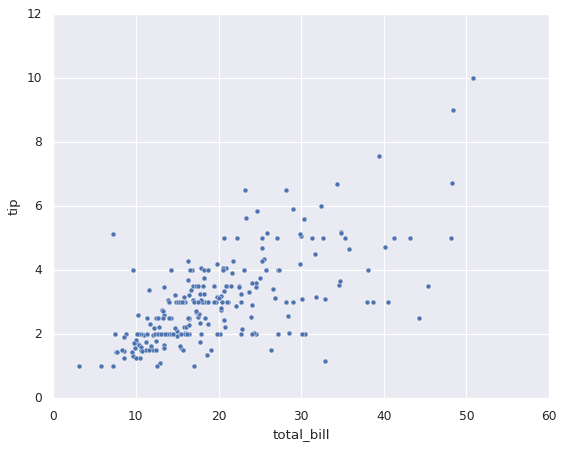

In [26]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

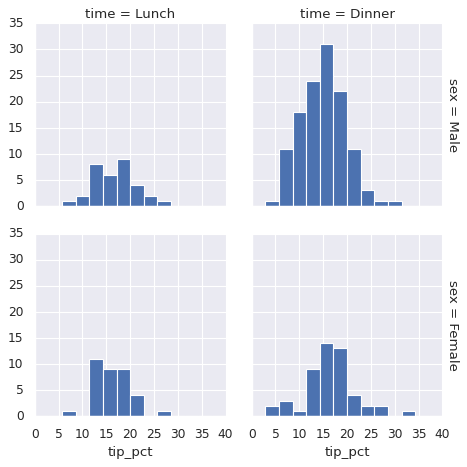

In [23]:
# Create a tips percentage column
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

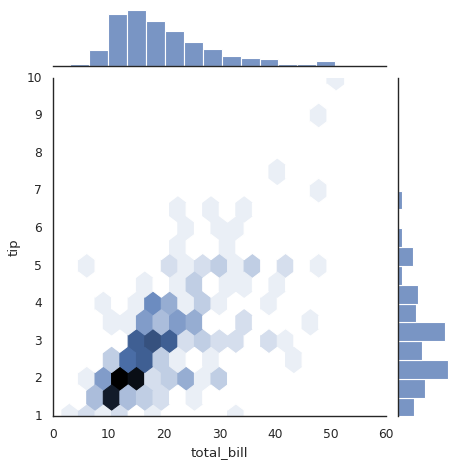

In [24]:
with sns.axes_style('white'):
    sns.jointplot(data=tips, x="total_bill", y="tip", kind='hex')

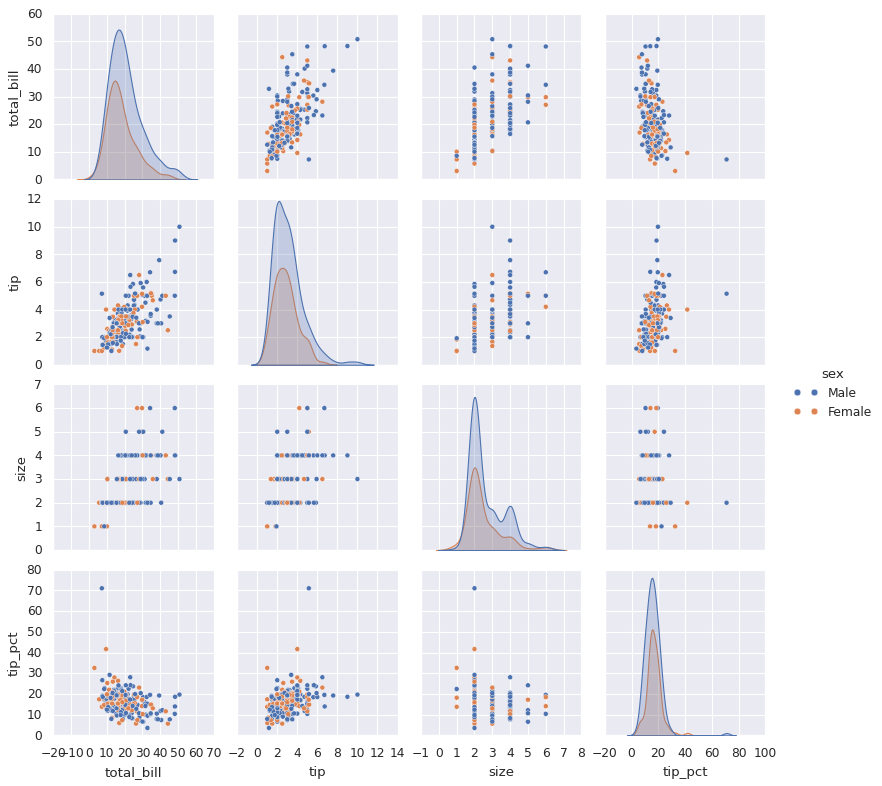

In [28]:
# Create a pairplot of the entire tips dataset.
# The 'hue' argument colors the points by a categorical variable, like 'sex'.
sns.pairplot(tips, hue='sex');

 For further materials, you can refer to https://jakevdp.github.io/PythonDataScienceHandbook/